# Processamento digital de Imagens: Projeto 3

 Projeto de visão computacional para categorização de caracteres em Japonês, usando um dataset público cujo link está abaixo.

 Foram consideradas cerca de 50 categorias diferentes onde cada categoria tem cerca de 20 amostras diferentes para serem treinadas na rede convolucional.

Professor: Agostinho brito

Aluno: Paulo Sousa

###A categorização é uma das áreas mais aplicadas de IA, principalmente quando em conjunto com uma rede convolucional, nesta aplicação foi usada uma rede para categorizar sílabas manuscritas de um dos 3 alfabetos japoneses ( hiragana ) devido a quantidade reduzida de classes para facilitar o processamento

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import cv2 as cv
#from scipy.misc import imread, imsave, imresize

In [ ]:
#Fonte dos dados:
#https://github.com/inoueMashuu/hiragana-dataset/tree/master/hiragana_images

#a função de upload é muito mais lento do que o drag and drop de arquivos, caso for usar upload é só descomentar
'''from google.colab import files
uploaded = files.upload()'''

'from google.colab import files\nuploaded = files.upload()'

###Um dos alfabetos japoneses, o hiragana, é formado por cerca de 104 sílabas (kanas), dentre elas foram utilizadas as seguintes categorias:

##a:あ, ba: ば, chi:ち, da:だ, e:え, fu:ふ, ha:は, he:へ, hi:ひ, ho:ほ, i:い, ji:じ, ka:か, ke:け, ki:き, ko:こ, ku:く, ma:ま, me:め,mi:み,mo:も,mu:む,na:な,ne:ね,ni: 	に, no:の, nu:ぬ, o:お, pi:ぴ, ra:ら, re:れ ,ri:り,ro:ろ,ru:る ,sa:さ ,se:せ, shi:し, so:そ, su:す, ta:た, te:て , to:と,tsu:つ , u:う, wa:わ, wo:を, ya:や, yo:よ, yu:ゆ

In [ ]:
labels = {'A':0,'BA':1,'CHI':2,'DA':3,'E':4,'FU':5,
          'HA':6,'HE':7,'HI':8,'HO':9,'I':10,
          'JI':11,'KA':12,'KE':13,'KI':14,'KO':15,
          'KU':16,'MA':17,'ME':18,'MI':19,'MO':20,
          'MU':21,'NA':23,'NE':24,'NI':25,
          'NO':26,'NU':27,'O':28,'PI':29,'RA':30,
          'RE':31,'RI':32,'RO':33,'RU':34,'SA':35,
          'SE':36,'SHI':37,'SO':38,'SU':39,'TA':40,
          'TE':41,'TO':42,'TSU':43,'U':44,'WA':45,
          'WO':46,'YA':47,'YO':48,'YU':49}

          #'N':22,

###Foi necessário criar labels previamente para as imagens dado que o dataset vinha categorizado na base do nome do arquivo, portanto 2 arrays foram criados, o array de imagens e o array que iria ser usado para categorização

In [ ]:
#lendo as imagens salvas dos hiraganas
import os
directory = '/content'

images = []
for filename in os.listdir(directory):
    if filename.count("kana") == 1: #garantindo que não está pegando os arquivos do colab e sim os hiraganas
      images.append(filename)

imagesArr = []
pilImagesArr = []
for img in images:
  im1 = cv.imread(img,cv.IMREAD_GRAYSCALE)
  imagesArr.append(im1) #array de imagens que vai ser usado para treino

  ####
  im1 = Image.open(img)
  name = img
  #im1.save(name.replace('.jpg','.png'))
  pilImagesArr.append(im1) #array de imagens que será usado para criar as classes pelo nome



In [ ]:
#criando os labels para validação futura
labelsArr =[]

for img in pilImagesArr:
  for label in labels:
    if img.filename.count("kana"+label) == 1:
      labelsArr.append(labels[label])


408
408
2


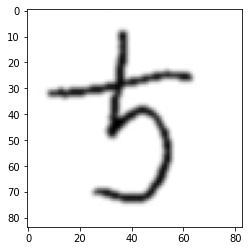

In [ ]:
#mostrando alguns dados das imagens
print(len(labelsArr))
print(len(imagesArr))

print(labelsArr[0])
plt.imshow(imagesArr[0],cmap=plt.cm.binary)
plt.show()

###Para fazer uma validação do treino que irá ser feito, é necessário dividir o dataset em 2 partes, uma de treino e uma de teste, desta forma foi usado 66.6% do dataset para treino\ e o restante para teste

In [ ]:
#setando os arrays de treino e teste
length = len(labelsArr)
cut_index = int(length / 3)


test_labels = labelsArr[:cut_index]
train_labels = labelsArr[cut_index:]

test_images = imagesArr[:cut_index]
train_images = imagesArr[cut_index:]

len(train_images)


272

In [ ]:
#convertendo para numpyarray
train_images = np.array(train_images)
test_images = np.array(test_images)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

###A normalização é o processo de tratamento as features de entrada não irão causar um impacto maior do que o necessário nos pesos que irão ser atualizados da rede, portanto nesse caso esses dados dos pixeis eles irão variar em uma faixa de 0 até 1 após a divisão por 255

In [ ]:
#normalizando os valores das imagens
train_images = train_images / 255.0

test_images = test_images / 255.0

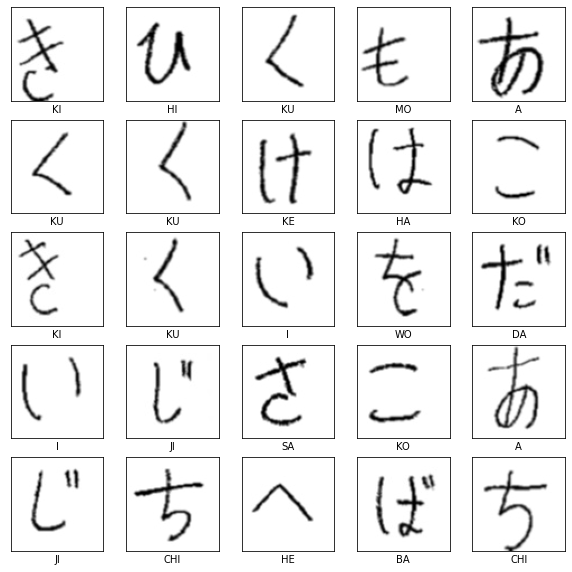

In [ ]:
#plotando os primeiros hiraganas com as respectivas classes
class_names = {value : key for (key, value) in labels.items()} #reverse dictionary

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #
    plt.xlabel(class_names[train_labels[i]])

plt.show()


###Aqui segue a estrutura da rede, a entrada possuí uma entrada de 84 : 83 cujo representam o tamanho das imagens, a camada mediana foi uma quantidade arbitrária escolhida e para uma possível melhor performace deveria ser testada com várias outras camadas intermediárias com uma quantidade de nós variada, e a camada de saída é respectiva as classes que se devem classificar.

In [ ]:
#inicializando a rede neural, 3 camadas, features de entrada igual ao tamanho das imagens, 128 camadas medianas e saída com as 50 categorias
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(84, 83)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(50, activation='softmax')
])


###O otimizador utilizado foi o adam, o otimizador serve para procurar os mínimos locais que vão minimizar o erro da função que vai ser gerada pela rede

In [ ]:
#compilando a rede
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#treinando a rede
print(type(train_images))
print(type(train_labels))
print(train_images.shape)
print(train_labels.shape)

model.fit(train_images, train_labels, epochs=10)
#

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(272, 84, 83)
(272,)
Epoch 1/10
9/9 [==============================] - 1s 11ms/step - loss: 3.0039 - accuracy: 0.3713
Epoch 2/10
9/9 [==============================] - 0s 10ms/step - loss: 0.9745 - accuracy: 0.8235
Epoch 3/10
9/9 [==============================] - 0s 10ms/step - loss: 0.3253 - accuracy: 0.9522
Epoch 4/10
9/9 [==============================] - 0s 12ms/step - loss: 0.1016 - accuracy: 0.9926
Epoch 5/10
9/9 [==============================] - 0s 12ms/step - loss: 0.0452 - accuracy: 0.9963
Epoch 6/10
9/9 [==============================] - 0s 10ms/step - loss: 0.0200 - accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 0s 11ms/step - loss: 0.0133 - accuracy: 1.0000
Epoch 8/10
9/9 [==============================] - 0s 12ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 9/10
9/9 [==============================] - 0s 10ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 10/10
9/9 [==============================] - 0s 9ms/

###Pode ser visto que a rede convergiu para uma acurácia de 100% em poucas iterações, o que indica que a rede provavelmente está com um overfit ( tendênciamento muito alto ) e portanto não generaliza bem o modelo gerado para outras possíveis situações de categorização de dados fora deste dataset, poderia ser melhorado com mais dados

In [ ]:
#testando a acurácia do resultado do treino
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


5/5 - 0s - loss: 0.6480 - accuracy: 0.8382 - 163ms/epoch - 33ms/step

Test accuracy: 0.8382353186607361


###Agora abstraindo o conhecimento gerado pela rede com o dataset de treino para o dataset de teste...

In [ ]:
#array de predições para cada classe por imagem
predictions = model.predict(test_images)


In [ ]:
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[4.43305144e-05 5.46157826e-05 9.94161308e-01 2.58046221e-05
 1.09546090e-05 2.81743065e-04 4.19240423e-05 4.46770500e-05
 8.30083809e-06 9.95272538e-04 5.20036065e-06 2.10131202e-06
 1.34083763e-04 1.09130508e-06 8.23705268e-05 9.99814165e-06
 9.32902549e-05 5.02729781e-05 8.77061757e-06 1.19230017e-05
 2.78854368e-05 1.58566650e-06 1.16938895e-06 4.01099754e-07
 3.49160814e-07 2.53425992e-06 1.30562739e-07 1.60622776e-07
 5.13116447e-06 1.03115667e-06 1.65059282e-06 3.47527862e-06
 8.58805797e-05 3.96812306e-04 1.09396596e-03 3.50197632e-04
 2.90480093e-04 2.82063922e-07 8.49830685e-05 1.07612104e-04
 3.89379275e-05 5.23307392e-07 2.07258699e-06 4.73523016e-08
 8.13450285e-08 5.77935225e-07 1.37080392e-03 1.71190982e-06
 6.14866876e-05 6.77452618e-08]
2
2


In [ ]:
#setando funções para plotar as imagens, categorias e a % de chance de ser de cada categoria
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(50), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


###Amostragem de alguns dados representando a imagem analisada, a probabilidade da classe escolhida como melhor representante e um gráfico de barras representando as probabilidades das classes para a respectiva classe da imagem

(136, 50)
(136,)


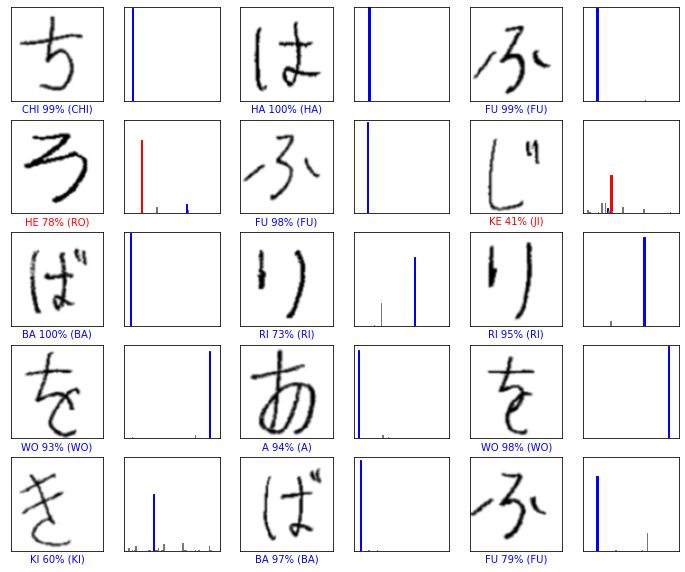

In [ ]:
print(predictions.shape)
print(test_labels.shape)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()


##Com o resultado deste trabalho conseguimos uma rede com 83% de acurácia ( nesta iteração ) e podemos ver que classificou de forma correta uma boa parte dos dados selecionados, futuros trabalhos poderiam constar com mais dados preferencialmente de uma fonte de dados diferente, uma nova arquitetura menos arbitrária e mais empírica para o melhor acurácia pro formato da rede, utilização de outros otimizadores ou outros tipos de rede como uma GAN para categorização dos dados.